For the random parameter sets, show that the more imbalanced the concentrations become, the less positive synergy. This is in response to reviewer 1 comment 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os,re
sys.path.append("../../../work2/shared/utilsGRF/") #update path accordingly to repository 
sys.path.append("../../../work2/ownutils/scriptssyn/") #update path accordingly
import basic
import utils_boundariessyn
import AnalyseBoundarysearch
from shutil import copyfile
sys.path.append("./bin")
import pandas as pd
import BoundaryFinder as BF
import matplotlib as mpl
import PolAB_A_allpars
import alphashape
import json

6672
6734
6734
6684
6736
6814
6687
6695
6680
6710
67146


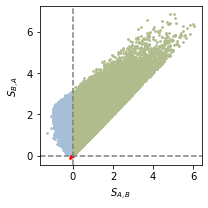

In [6]:
f1="/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-kinsynsub1/randomsamplingjuly27/2020_07_27/final_results"
f2="/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-kinsynsub1/randomsamplingjuly31/2020_07_31/final_results"
fc1=10
fc2=10
minb=0
maxb=4
parfc=3
alldfs=[]
nit=1000000

green="#c6cdad"
blue="#d3dbe4"
red="#e3cbc8"

green2="#b1bc8c"
blue2="#a6bed8"

for seed in range(10):

    title="minb=%g_maxb=%g_parfc=%s_fc1=%s_fc2=%s"%(minb,maxb,parfc,fc1,fc2)
    if seed <3:
        f_=os.path.join(f1,"2020_0727_randompoints_nit=%d_%s_seed=%d.df"%(nit,title,seed))
    else:
        f_=os.path.join(f2,"2020_0727_randompoints_nit=%d_%s_seed=%d.df"%(nit,title,seed))
    df=pd.read_csv(f_)
    print(len(df))
    alldfs.append(df)
df=pd.concat(alldfs)
print(len(df))
fig,ax=plt.subplots(1,1,figsize=(3,3))
mask1=df["quadrant"]==1
mask2=df["quadrant"]==2
mask3=df["quadrant"]==3
ax.scatter(df["SAB"].values[mask2],df["SBA"].values[mask2],s=3,color=blue2)
ax.scatter(df["SAB"].values[mask1],df["SBA"].values[mask1],s=3,color=green2)
ax.scatter(df["SAB"].values[mask3],df["SBA"].values[mask3],s=3,color="red")
ax.set_xlabel('$S_{A,B}$')
ax.set_ylabel('$S_{B,A}$')
ax.axhline(y=0,linestyle="--",color="gray")
ax.axvline(x=0,linestyle="--",color="gray")
ax.set_xticks(np.arange(0,7,2))
ax.set_yticks(np.arange(0,7,2))
plt.tight_layout()
plt.show()

In [20]:
subset=df[df["quadrant"]==1]
len(subset)

41553

In [32]:
41553/500

83.106

In [41]:

#in all these, A is the strongest
ratios=[0.5,0.4,0.3,0.2,0.1]
colors=["k","navy","dodgerblue","turquoise","lime"]
nm=0
nnm=0
nnm_lessinend=0
change_to_minus=0
for i in range(len(subset)):
    #if i%500==0:
    #    if i>0:
    #        plt.show()
    #    fig,axes=plt.subplots(1,2,figsize=(10,4))
            
            
    pars=subset.iloc[i].values[0:24].copy()
    m0=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars,np.array([0]),0)
    total=2
    mA=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars,np.array([0]),total)
    mB=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars,np.array([total]),0)
    
    points_x=[]
    points_y=[]
    for r in ratios:
        A=total*r
        B=total-A
        #print(A,B,total)
        mAB=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars,np.array([B]),A)
        SAB=np.log2(mAB/mA)
        SBA=np.log2(mAB/mB)
        points_x.append(SAB)
        points_y.append(SBA)
    if points_x[-1]<0:
        change_to_minus+=1
    if np.any(np.diff(points_x)>0):
        nnm+=1
        if points_x[0]>points_x[-1]:
            nnm_lessinend+=1
        #else:
        #    plt.scatter(points_x,points_y,c=colors)
        #    plt.show()
        #print("increasing!", points_x, np.diff(points_x))
        ax=axes[1]
        #plt.show()
        #fig,ax=plt.subplots(1,1,figsize=(4,4))
    else:
        ax=axes[0]
        nm+=1
        #print(".")
    #ax.scatter(points_x,points_y,c=colors,cmap=plt.cm.summer)
    #ax.plot(points_x,points_y,color="gray",alpha=0.1)
    
#plt.show()
print("change to negative", change_to_minus, change_to_minus/len(subset))
print("monotonically decrease in SAB", nm, nm/len(subset))
print("non-monotonic change in SAB", nnm, nnm/len(subset))
print("non-monotonic change in SAB, less SAB at 0.1 ratio", nnm_lessinend, nnm_lessinend/len(subset))
        

change to negative 20030 0.4820349914566939
monotonically decrease in SAB 34521 0.830770341491589
non-monotonic change in SAB 7032 0.16922965850841096
non-monotonic change in SAB, less SAB at 0.1 ratio 6496 0.1563304695208529


In [43]:
ratios=[0.5,0.4,0.3,0.2,0.1]
colors=["k","navy","dodgerblue","turquoise","lime"]
nm=0
nnm=0
nnm_lessinend=0
change_to_minus=0
for i in range(len(subset)):
    #if i%500==0:
    #    if i>0:
    #        plt.show()
    #    fig,axes=plt.subplots(1,2,figsize=(10,4))
            
            
    pars=subset.iloc[i].values[0:24].copy()
    m0=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars,np.array([0]),0)
    total=4
    mA=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars,np.array([0]),total)
    mB=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars,np.array([total]),0)
    if mA<mB:
        print("stronger changed!")
    points_x=[]
    points_y=[]
    for r in ratios:
        A=total*r
        B=total-A
        #print(A,B,total)
        mAB=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars,np.array([B]),A)
        SAB=np.log2(mAB/mA)
        SBA=np.log2(mAB/mB)
        points_x.append(SAB)
        points_y.append(SBA)
    if points_x[-1]<0:
        change_to_minus+=1
    if np.any(np.diff(points_x)>0):
        nnm+=1
        if points_x[0]>points_x[-1]:
            nnm_lessinend+=1
        #else:
        #    plt.scatter(points_x,points_y,c=colors)
        #    plt.show()
        #print("increasing!", points_x, np.diff(points_x))
        ax=axes[1]
        #plt.show()
        #fig,ax=plt.subplots(1,1,figsize=(4,4))
    else:
        ax=axes[0]
        nm+=1
        #print(".")
    #ax.scatter(points_x,points_y,c=colors,cmap=plt.cm.summer)
    #ax.plot(points_x,points_y,color="gray",alpha=0.1)
    
#plt.show()
print("change to negative", change_to_minus, change_to_minus/len(subset))
print("monotonically decrease in SAB", nm, nm/len(subset))
print("non-monotonic change in SAB", nnm, nnm/len(subset))
print("non-monotonic change in SAB, less SAB at 0.1 ratio", nnm_lessinend, nnm_lessinend/len(subset))
        

stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger c

stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger changed!
stronger c

KeyboardInterrupt: 

In [12]:
import matplotlib as mpl
mpl.rcParams["font.size"]=14

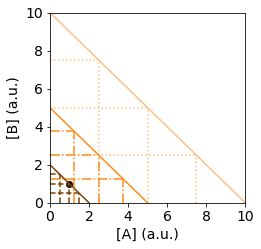

In [14]:
fig,ax=plt.subplots(1,1,figsize=(3.5,3.5))
ax.set_xlabel("[A] (a.u.)")
ax.set_ylabel("[B] (a.u.)")
colors=["#99b3e6","#3366cc","#1f3d7a"]
colors=["#804000","#ff8c1a","#ffbf80"][::-1]
linestyles=[":","-.","--"]
for t,total in enumerate([10,5,2]):
    color=colors[t]
    ax.plot([total,total*0.5,0],[0,total*0.5,total],color=colors[t])
    for ratio in [0.75,0.5,0.25]:
        #
        cB=total-(total*ratio)
        cA=total*ratio
        ax.plot([0,cA],[cB,cB],color=color,linestyle=linestyles[t])
        ax.plot([cA,cA],[0,cB],color=color,linestyle=linestyles[t])
        #ax.axhline(y=total*ratio,color=color,linestyle=":")
        #ax.axvline(x=total*(1-ratio),color=color,linestyle=":")
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticks([0,2,4,6,8,10])
ax.scatter(1,1,color="k")
plt.savefig("/Users/rosamartinezcorral/Dropbox (HMS)/work2/papersyn/figs/panels/FigS6synatdiftotals.pdf",bbox_inches="tight")
plt.show()